## Overview:
In this notebook, I explored patterns in employee retention and termination to analyze decisions around recruitment and performance. I examined which recruitment sources are linked to higher retention, identified common termination reasons, and analyzed how these reasons vary by department, performance scores, and employment satisfaction. I wanted to highlight the relationship between these factors using different visualization tools. This analysis provides insight into turnover drivers and supports strategic improvements in hiring and employee engagement.

Breakdown:

-I wanted to know how you were hired

-Of those methods, I wanted to compare how many stayed (retained) versus how many left (terminated)

-For those terminated, what were their reasons for leaving, (was it solely performance based or employee satisfaction). 

### Part 1: Load & Import Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data
data = pd.read_csv("../data/HRDataset.csv")

In [3]:
# Identify column names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [4]:
# view first 5 rows of your data
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


### Part 2: Question Development
My specific focus is tied to analyzing what really impacts retention and termination rates. I began by selecting a subset of columns from the HR dataset that I believed would help me make inferences around this data including:

`RecruitmentSource`: to identify what sources were used to hire employees

`EmploymentStatus`: to identify active vs inactive employees

`Termd`: to identify active vs inactive employees

`TermReason`: to identify the various reasons an employee was terminated

`DateOfTermination`: to calculate employee tenure

`DateofHire`: to calculate employee tenure

`Department`: to analyze trends across department

`Position`: to analyze trends based on position

`PerformanceScore`: to analyze trends based on employee performance

`EmpSatisfaction`: to analyze trends based on employee satisfaction


### Part 3: EDA & Visualizations

In [114]:
# Here I wanted to isolate the specific columns I needed
grouped = data[["RecruitmentSource", "EmploymentStatus", "Termd", "TermReason", "DateofTermination", "DateofHire", "Department", "Position", "PerformanceScore", "EmpSatisfaction"]]
print(grouped)


     RecruitmentSource        EmploymentStatus  Termd         TermReason  \
0             LinkedIn                  Active      0  N/A-StillEmployed   
1               Indeed  Voluntarily Terminated      1      career change   
2             LinkedIn  Voluntarily Terminated      1              hours   
3               Indeed                  Active      0  N/A-StillEmployed   
4        Google Search  Voluntarily Terminated      1   return to school   
..                 ...                     ...    ...                ...   
306           LinkedIn                  Active      0  N/A-StillEmployed   
307      Google Search  Voluntarily Terminated      1   Another position   
308  Employee Referral                  Active      0  N/A-StillEmployed   
309  Employee Referral                  Active      0  N/A-StillEmployed   
310           LinkedIn                  Active      0  N/A-StillEmployed   

    DateofTermination DateofHire         Department                  Position  \
0     

In [115]:
# Here I wanted to save these specific columns as a CSV file for easy access
grouped.to_csv('grouped.csv', index=False)


In [116]:
# Group by RecruitmentSource to count total and retained employees
retention_df = grouped.groupby('RecruitmentSource').agg(
    total_employees=('EmploymentStatus', 'count'),
    retained_employees=('Termd', lambda x: (x == 0).sum())
).reset_index()

In [117]:
# Calculate the retention rate as a percentage & store those values
retention_df['retention_rate'] = retention_df['retained_employees'] / retention_df['total_employees'] * 100
retention_df.sort_values('retention_rate', ascending=False, inplace=True)
retention_df

,RecruitmentSource,total_employees,retained_employees,retention_rate
8,Website,13,12,92.307692
2,Employee Referral,31,26,83.870968
5,LinkedIn,76,58,76.315789
4,Indeed,87,66,75.862069
0,CareerBuilder,23,12,52.173913
7,Other,2,1,50.000000
1,Diversity Job Fair,29,13,44.827586
3,Google Search,49,19,38.775510
6,On-line Web application,1,0,0.000000


In [141]:
retention_df.sum()

RecruitmentSource     WebsiteEmployee ReferralLinkedInIndeedCareerBu...
total_employees                                                     311
retained_employees                                                  207
retention_rate                                               514.133528
dtype: object

/var/folders/6y/rmrf127d2fl1md8187cb18z40000gn/T/ipykernel_43149/4830676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


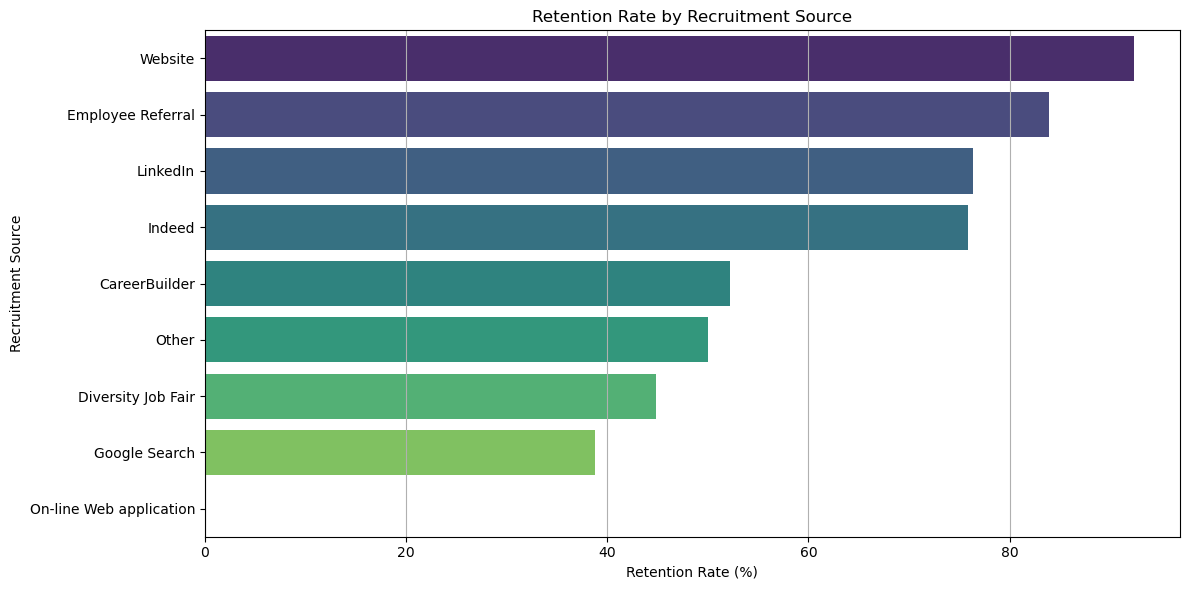

In [118]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(
    data=retention_df,
    x='retention_rate',
    y='RecruitmentSource',
    palette='viridis'
)
plt.xlabel('Retention Rate (%)')
plt.ylabel('Recruitment Source')
plt.title('Retention Rate by Recruitment Source')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

In [119]:
# Identify and count the number of missing values if any
grouped.isnull().sum()

RecruitmentSource      0
EmploymentStatus       0
Termd                  0
TermReason             0
DateofTermination    207
DateofHire             0
Department             0
Position               0
PerformanceScore       0
EmpSatisfaction        0
dtype: int64

In [120]:
# Dropped retained employee data to store only terminated employees
grouped.dropna()

,RecruitmentSource,EmploymentStatus,Termd,TermReason,DateofTermination,DateofHire,Department,Position,PerformanceScore,EmpSatisfaction
1,Indeed,Voluntarily Terminated,1,career change,6/16/2016,3/30/2015,IT/IS,Sr. DBA,Fully Meets,3
2,LinkedIn,Voluntarily Terminated,1,hours,9/24/2012,7/5/2011,Production,Production Technician II,Fully Meets,3
4,Google Search,Voluntarily Terminated,1,return to school,9/6/2016,7/11/2011,Production,Production Technician I,Fully Meets,4
10,Diversity Job Fair,Voluntarily Terminated,1,Another position,1/12/2017,1/10/2011,Production,Production Technician I,Fully Meets,4
11,Diversity Job Fair,Voluntarily Terminated,1,unhappy,9/19/2016,4/2/2012,Production,Production Technician I,Fully Meets,3
...,...,...,...,...,...,...,...,...,...,...
301,Website,Voluntarily Terminated,1,unhappy,9/7/2015,5/16/2011,Production,Production Technician I,Fully Meets,3
302,Google Search,Voluntarily Terminated,1,Another position,5/14/2012,1/10/2011,Production,Production Technician I,Fully Meets,5
303,Diversity Job Fair,Voluntarily Terminated,1,relocation out of area,6/27/2015,1/9/2012,Production,Production Technician I,Fully Meets,4
304,LinkedIn,Voluntarily Terminated,1,retiring,2/21/2016,1/7/2013,Production,Production Technician II,Exceeds,3


In [121]:
# Filter the DataFrame to include only terminated employees
terminated_only = grouped[grouped['Termd'] == 1]

In [122]:
# Group by RecruitmentSource to count total versus employees that were terminated
termination_df = grouped.groupby('RecruitmentSource').agg(
    total_employees=('EmploymentStatus', 'count'),
    terminated_employees=('Termd', lambda x: (x == 1).sum())
).reset_index()

In [139]:
# Calculate the termination rate as a percentage & store those values
termination_df['termination_rate'] = termination_df['terminated_employees'] / termination_df['total_employees'] * 100
termination_df.sort_values('termination_rate', ascending=True, inplace=True)
termination_df

,RecruitmentSource,total_employees,terminated_employees,termination_rate
8,Website,13,1,7.692308
2,Employee Referral,31,5,16.129032
5,LinkedIn,76,18,23.684211
4,Indeed,87,21,24.137931
0,CareerBuilder,23,11,47.826087
7,Other,2,1,50.000000
1,Diversity Job Fair,29,16,55.172414
3,Google Search,49,30,61.224490
6,On-line Web application,1,1,100.000000


In [140]:
termination_df.sum()

RecruitmentSource       WebsiteEmployee ReferralLinkedInIndeedCareerBu...
total_employees                                                       311
terminated_employees                                                  104
termination_rate                                               385.866472
dtype: object

/var/folders/6y/rmrf127d2fl1md8187cb18z40000gn/T/ipykernel_43149/2697825858.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=termination_df, x='termination_rate', y='RecruitmentSource', palette='magma')


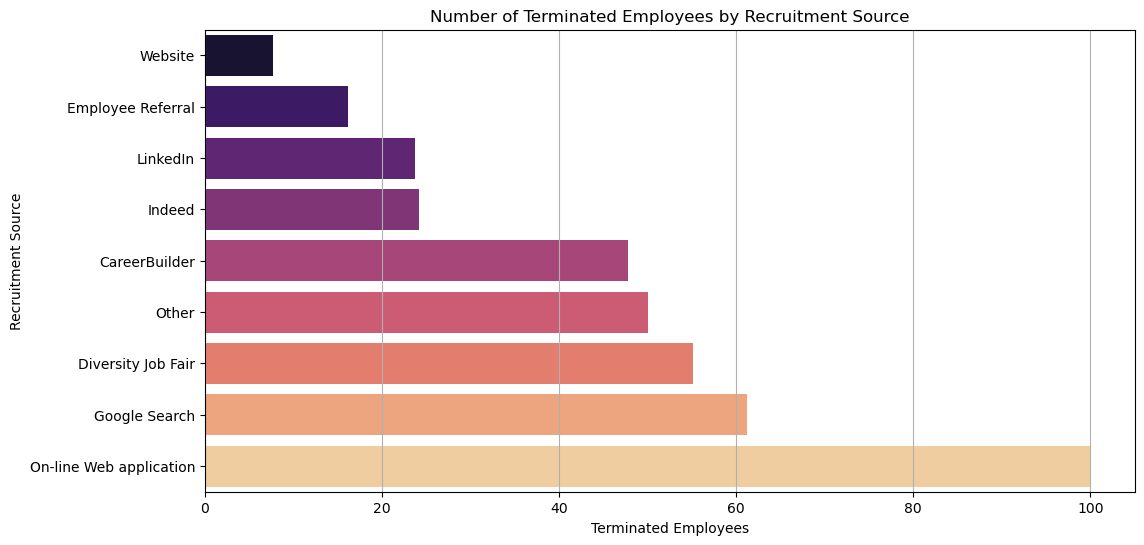

In [126]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=termination_df, x='termination_rate', y='RecruitmentSource', palette='magma')
plt.title('Number of Terminated Employees by Recruitment Source')
plt.xlabel('Terminated Employees')
plt.ylabel('Recruitment Source')
plt.grid(True, axis='x')
plt.show()

In [127]:
# Group the data by recruitment source and calculate total employees that were retained or terminated from the total number of employees
grouped = data.groupby('RecruitmentSource').agg(
    total_employees=('EmploymentStatus', 'count'),
    retained=('Termd', lambda x: (x == 0).sum()),
    terminated=('Termd', lambda x: (x == 1).sum())
).reset_index()
print(grouped)

         RecruitmentSource  total_employees  retained  terminated
0            CareerBuilder               23        12          11
1       Diversity Job Fair               29        13          16
2        Employee Referral               31        26           5
3            Google Search               49        19          30
4                   Indeed               87        66          21
5                 LinkedIn               76        58          18
6  On-line Web application                1         0           1
7                    Other                2         1           1
8                  Website               13        12           1


In [128]:
# Combine the grouped DataFrame to be able to plot in a side-by-side view retained vs. terminated employees
melted = pd.melt(grouped,
                 id_vars='RecruitmentSource',
                 value_vars=['retained', 'terminated'],
                 var_name='Status',
                 value_name='Rate')
print(melted)

          RecruitmentSource      Status  Rate
0             CareerBuilder    retained    12
1        Diversity Job Fair    retained    13
2         Employee Referral    retained    26
3             Google Search    retained    19
4                    Indeed    retained    66
5                  LinkedIn    retained    58
6   On-line Web application    retained     0
7                     Other    retained     1
8                   Website    retained    12
9             CareerBuilder  terminated    11
10       Diversity Job Fair  terminated    16
11        Employee Referral  terminated     5
12            Google Search  terminated    30
13                   Indeed  terminated    21
14                 LinkedIn  terminated    18
15  On-line Web application  terminated     1
16                    Other  terminated     1
17                  Website  terminated     1


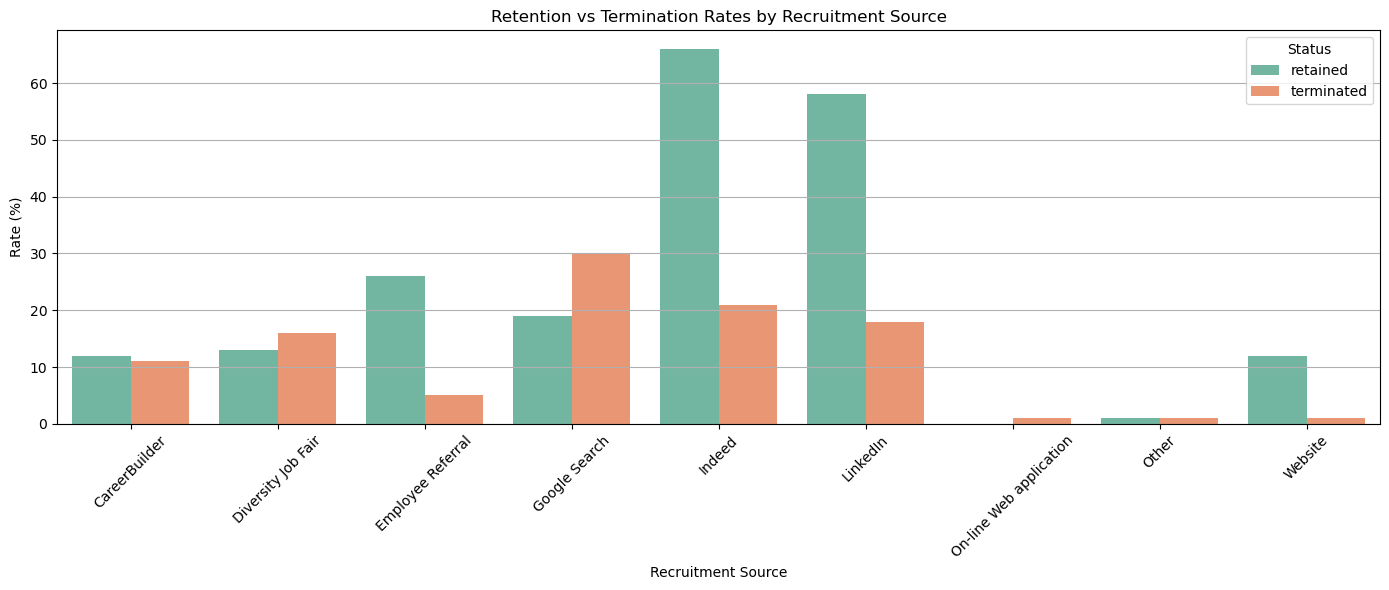

In [129]:
# Plot the data
plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x='RecruitmentSource', y='Rate', hue='Status', palette='Set2')
plt.title('Retention vs Termination Rates by Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [130]:
# Convert hire and termination dates to date/time format and calculate employee tenure in years
terminated_only['DateofHire'] = pd.to_datetime(terminated_only['DateofHire'])
terminated_only['DateofTermination'] = pd.to_datetime(terminated_only['DateofTermination'])
terminated_only['TenureYears'] = (terminated_only['DateofTermination'] - terminated_only['DateofHire']).dt.days / 365

In [ ]:
# Count the number of terminated employees for each reason
terminated_only['TermReason'].value_counts()

TermReason
Another position                    20
unhappy                             14
more money                          11
career change                        9
hours                                8
attendance                           7
return to school                     5
relocation out of area               5
performance                          4
military                             4
retiring                             4
no-call, no-show                     4
maternity leave - did not return     3
medical issues                       3
Learned that he is a gangster        1
Fatal attraction                     1
gross misconduct                     1
Name: count, dtype: int64

/var/folders/6y/rmrf127d2fl1md8187cb18z40000gn/T/ipykernel_43149/2313355752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=terminated_only, y='TermReason', order=terminated_only['TermReason'].value_counts().index, palette='pastel')


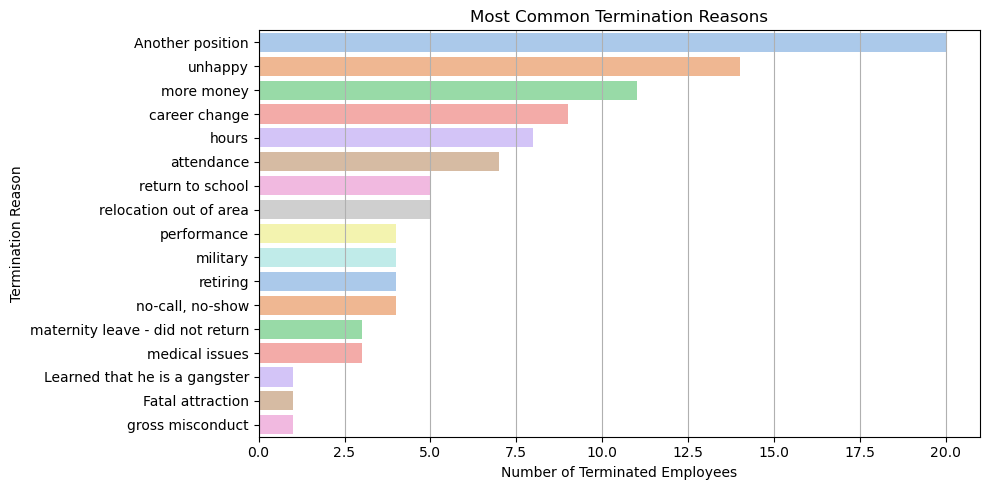

In [132]:
# Plot the data
plt.figure(figsize=(10, 5))
sns.countplot(data=terminated_only, y='TermReason', order=terminated_only['TermReason'].value_counts().index, palette='pastel')
plt.title('Most Common Termination Reasons')
plt.xlabel('Number of Terminated Employees')
plt.ylabel('Termination Reason')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [133]:
# Group by the total number of terminated employees by termination reasons and performance scores, and count the number for occurrence 
term_perform = terminated_only.groupby(['TermReason', 'PerformanceScore']).size().reset_index(name='Count')
print(term_perform)

                          TermReason   PerformanceScore  Count
0                   Another position            Exceeds      2
1                   Another position        Fully Meets     17
2                   Another position                PIP      1
3                   Fatal attraction                PIP      1
4      Learned that he is a gangster        Fully Meets      1
5                         attendance        Fully Meets      4
6                         attendance  Needs Improvement      3
7                      career change        Fully Meets      6
8                      career change  Needs Improvement      2
9                      career change                PIP      1
10                  gross misconduct            Exceeds      1
11                             hours        Fully Meets      8
12  maternity leave - did not return            Exceeds      1
13  maternity leave - did not return        Fully Meets      2
14                    medical issues        Fully Meets

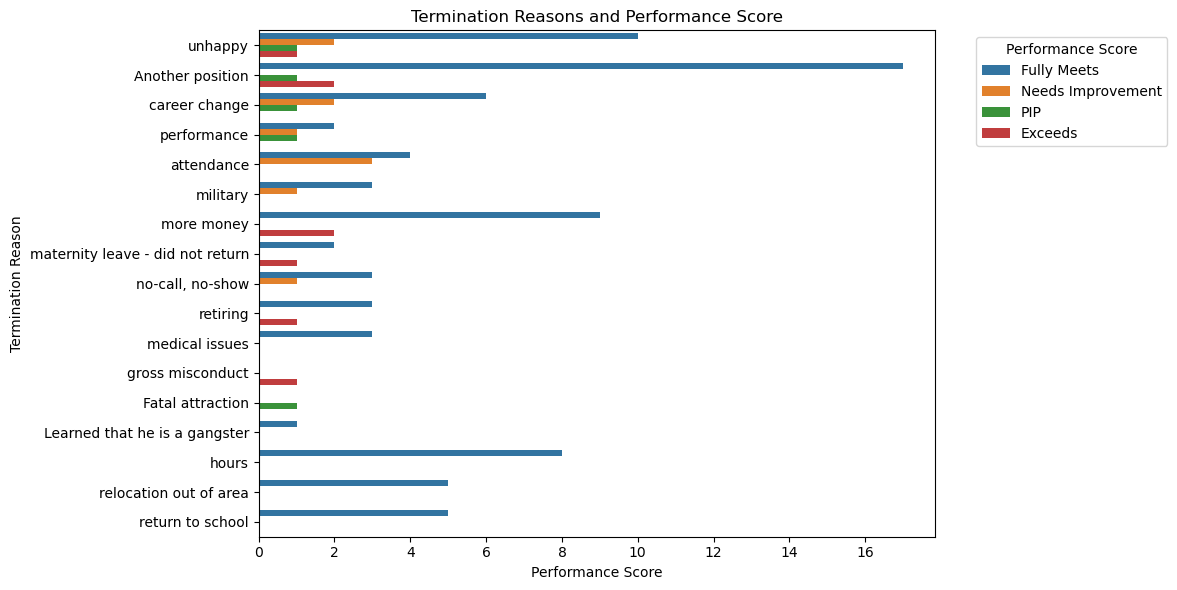

In [134]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.countplot(data=terminated_only, y='TermReason', hue='PerformanceScore', order=term_perform['TermReason'].value_counts().index)
plt.title('Termination Reasons and Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Termination Reason')
plt.legend(title='Performance Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [135]:
# Group by the total number of terminated employees by termination reasons and satisfaction and count the number for occurrence 
term_satisfact = terminated_only.groupby(['TermReason', 'EmpSatisfaction']).size().reset_index(name='Count')
print(term_satisfact)

                          TermReason  EmpSatisfaction  Count
0                   Another position                2      1
1                   Another position                3      4
2                   Another position                4      7
3                   Another position                5      8
4                   Fatal attraction                5      1
5      Learned that he is a gangster                5      1
6                         attendance                3      2
7                         attendance                4      4
8                         attendance                5      1
9                      career change                3      4
10                     career change                4      3
11                     career change                5      2
12                  gross misconduct                5      1
13                             hours                3      3
14                             hours                4      3
15                      

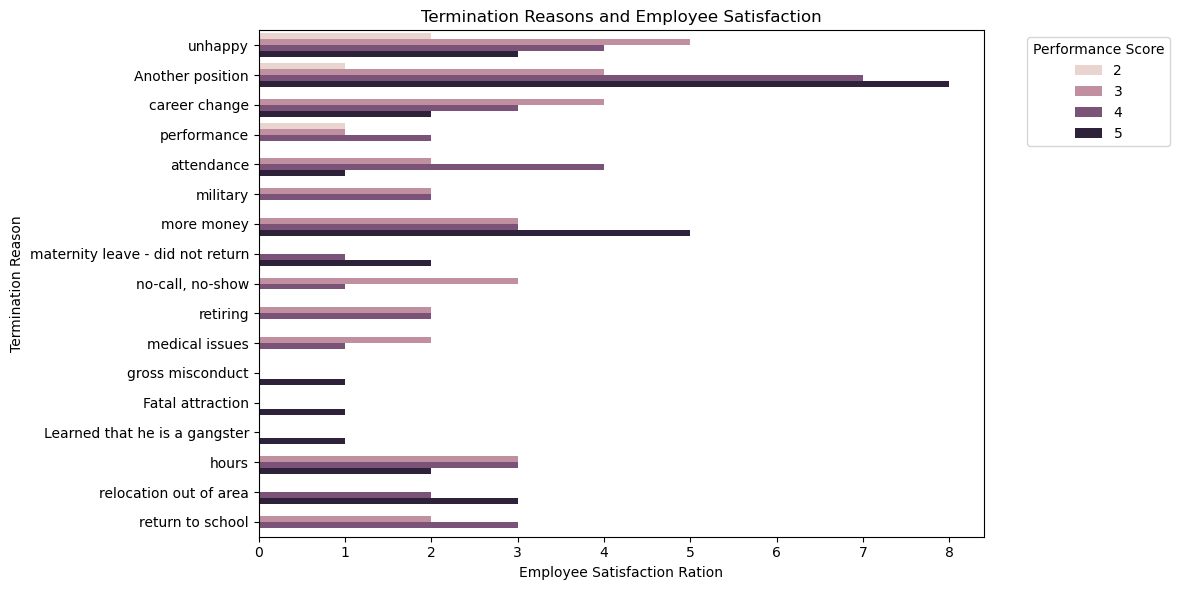

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.countplot(data=terminated_only, y='TermReason', hue='EmpSatisfaction', order=term_perform['TermReason'].value_counts().index)
plt.title('Termination Reasons and Employee Satisfaction')
plt.xlabel('Employee Satisfaction Ration')
plt.ylabel('Termination Reason')
plt.legend(title='Performance Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Part 4: Analytical Questions Analysis

**Q1**: Which recruitment sources are linked to higher retention? Which recruitment sources are linked to the highest termination rates?

**Answer here**: 

After analyzing the data, I found that the highest retention rate (at 92%) was among employees hired through the company website. When examining termination rates per recruitment source, the highest termination rate (61%) was linked to hires made through Google search. When comparing recruitment sources side by side, platforms like LinkedIn and Indeed had the highest overall volume of hires, showing a higher retention rate, suggesting these platforms drive significant traffic but mixed retention outcomes.

**Final Thought**:
Recruitment sources can have an impact on employee retention. While the company website and platforms like LinkedIn and Indeed attracts candidates who are more likely to stay long-term, being sourced and hired through a Google search suggests a higher termination rate. I believe it is safe to infer that more targeted and intentional recruitment platforms - such as the careers page on the company website or vetted and reputable job boards - are more likely to lead to better long-term employee retention goals.

**Q2**: What are the most common termination reasons? How do they vary by or are potentially impacted by performance scores and employee satisfaction?

**Answer here**:

After analyzing the data, the most common termination reason was employees accepting another position. To explore whether this decision was influenced by performance or satisfaction, I reviewed the associated scores. Of the 20 employees who left for another opportunity, 17 had Fully Meets performance ratings and 2 had Exceeds Expectations, indicating strong overall performance. In terms of satisfaction, only 5 of the 20 reported scores of 3 or below, suggesting that the majority were mostly satisfied with their roles. This implies that many of these departures were likely driven by external opportunities rather than dissatisfaction or poor performance.

**Final Thought**: Most employees who left the company voluntarily to pursue other opportunities were high performers and generally satisfied with their roles. In my opinion, this proves that turnover may not always be tied to poor performance or dissatisfaction, but can simply be related to employees pursuing different avenues, likely associated with growth opportunities or simply areas of interests which may not be available at the company. To combat this, I would recommend that investing in internal mobility and career development pathways, which could help retain top talent.

### Part 5: Next Steps

***Enhance Recruitment & Retention Initiatives***:
The company should prioritze recruitment through high retention sources such as the company website and vetted job boards (like LinkedIn and Indeed). Job postings should be up to date and regularly checked by the HR department allowing recruits to feel supported and invested from the initial stage. The company should plan to reduce reliance on broader searches and less effective searches by investing in company branding on platforms that aim to attract quality candidates. 

***Internal Career Growth Initiatives Aligned with Personal Interests***:
The company should create opportunities for employees to explore career advancement, not only in their specific department but also across different teams based on interests or where their skill sets can be easily transferred. For example, a high performing employee in sales may be great at what they do (based on their performance score), but with an interest in production, should have opportunities to shadow, engage in rotational programs, or have access to skill building workshops that support internal mobility. Encouraging this type of cross-functional growth can increase retention and growth within the company, allowing employees to envision a long-term future within the organization.